<a href="https://colab.research.google.com/github/rpmjp/Machine-Learning-CS-675-NJIT-/blob/main/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Note to grader:** Each question consists of parts, e.g. Q1(i), Q1(ii), etc. Each part must be graded on scale of 0-4 scale, following the standard NJIT convention (A: 4, B+: 3.5, B: 3, C+: 2.5, C: 2, D: 1, F: 0).

The total score must be re-scaled to a percentage.

For questions stated as being worth 8 points, grade on a 0-4 scale, and multiply by 2.

# **Assignment 2**

This assignment walks you through the basics of the perceptron. You will also do some first experiments on a toy data set, and check the effect of hyperparameters. The intended goal of the assignment is to familiarize you further with the Jupyter/Colab environment and help you acquire some tools that we will later use to experiment with 'professional-grade' data sets and algorithms.


<b>Note: </b> You must run/evaluate all cells. <b>Order of cell execution is important.<b>

**You may use ChatGPT or other LLMs to help with this assignment.** (Unless the question specifically requests it, the use of LLMs is **optional**.) However, if you do use an LLM to help with a particular question, you must submit a full transcript of all your interactions with the LLM in the form of screenshots embedded in the text cells provided. (Alternatively, if the LLM allows links to the transcripts to be shared, then you can place such links in the text cells instead. Please make sure that the links work!) You must also do this on your own &mdash; using the results of another person's LLM session, or sharing your session with another student, are not acceptable. In your answer, you should also state how you were able to make use of the LLM's responses.

Here is an example of what a ChatGPT transcript looks like. Note that the transcript includes the full output as well as the user prompt that generated the ChatGPT response. Please use a separate text cell for each image you embed.

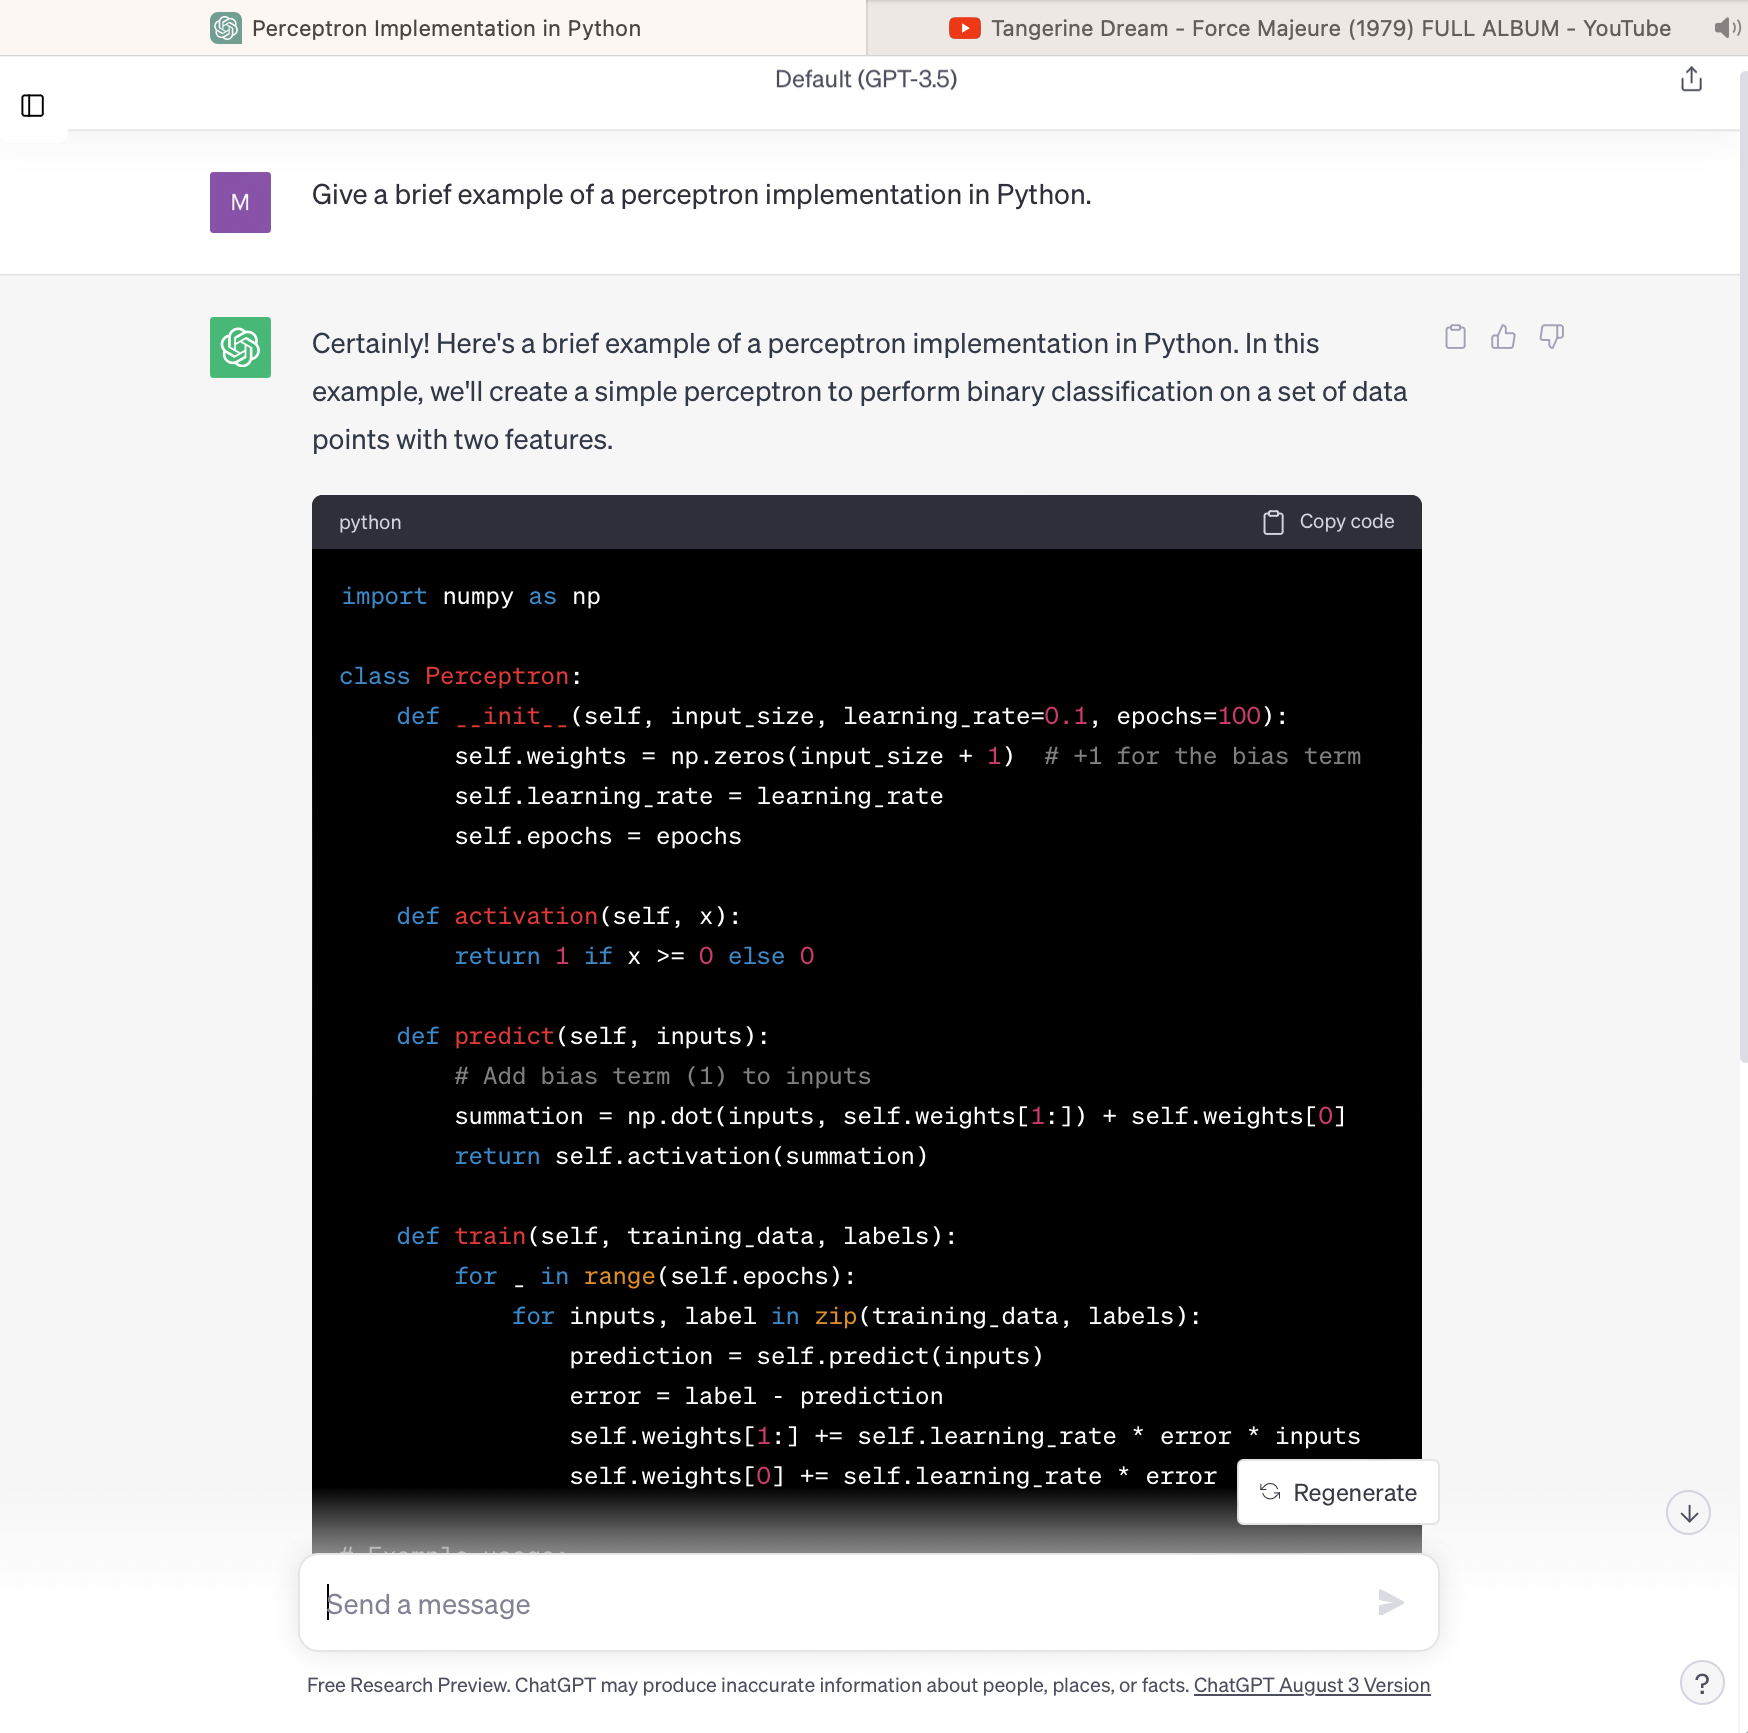

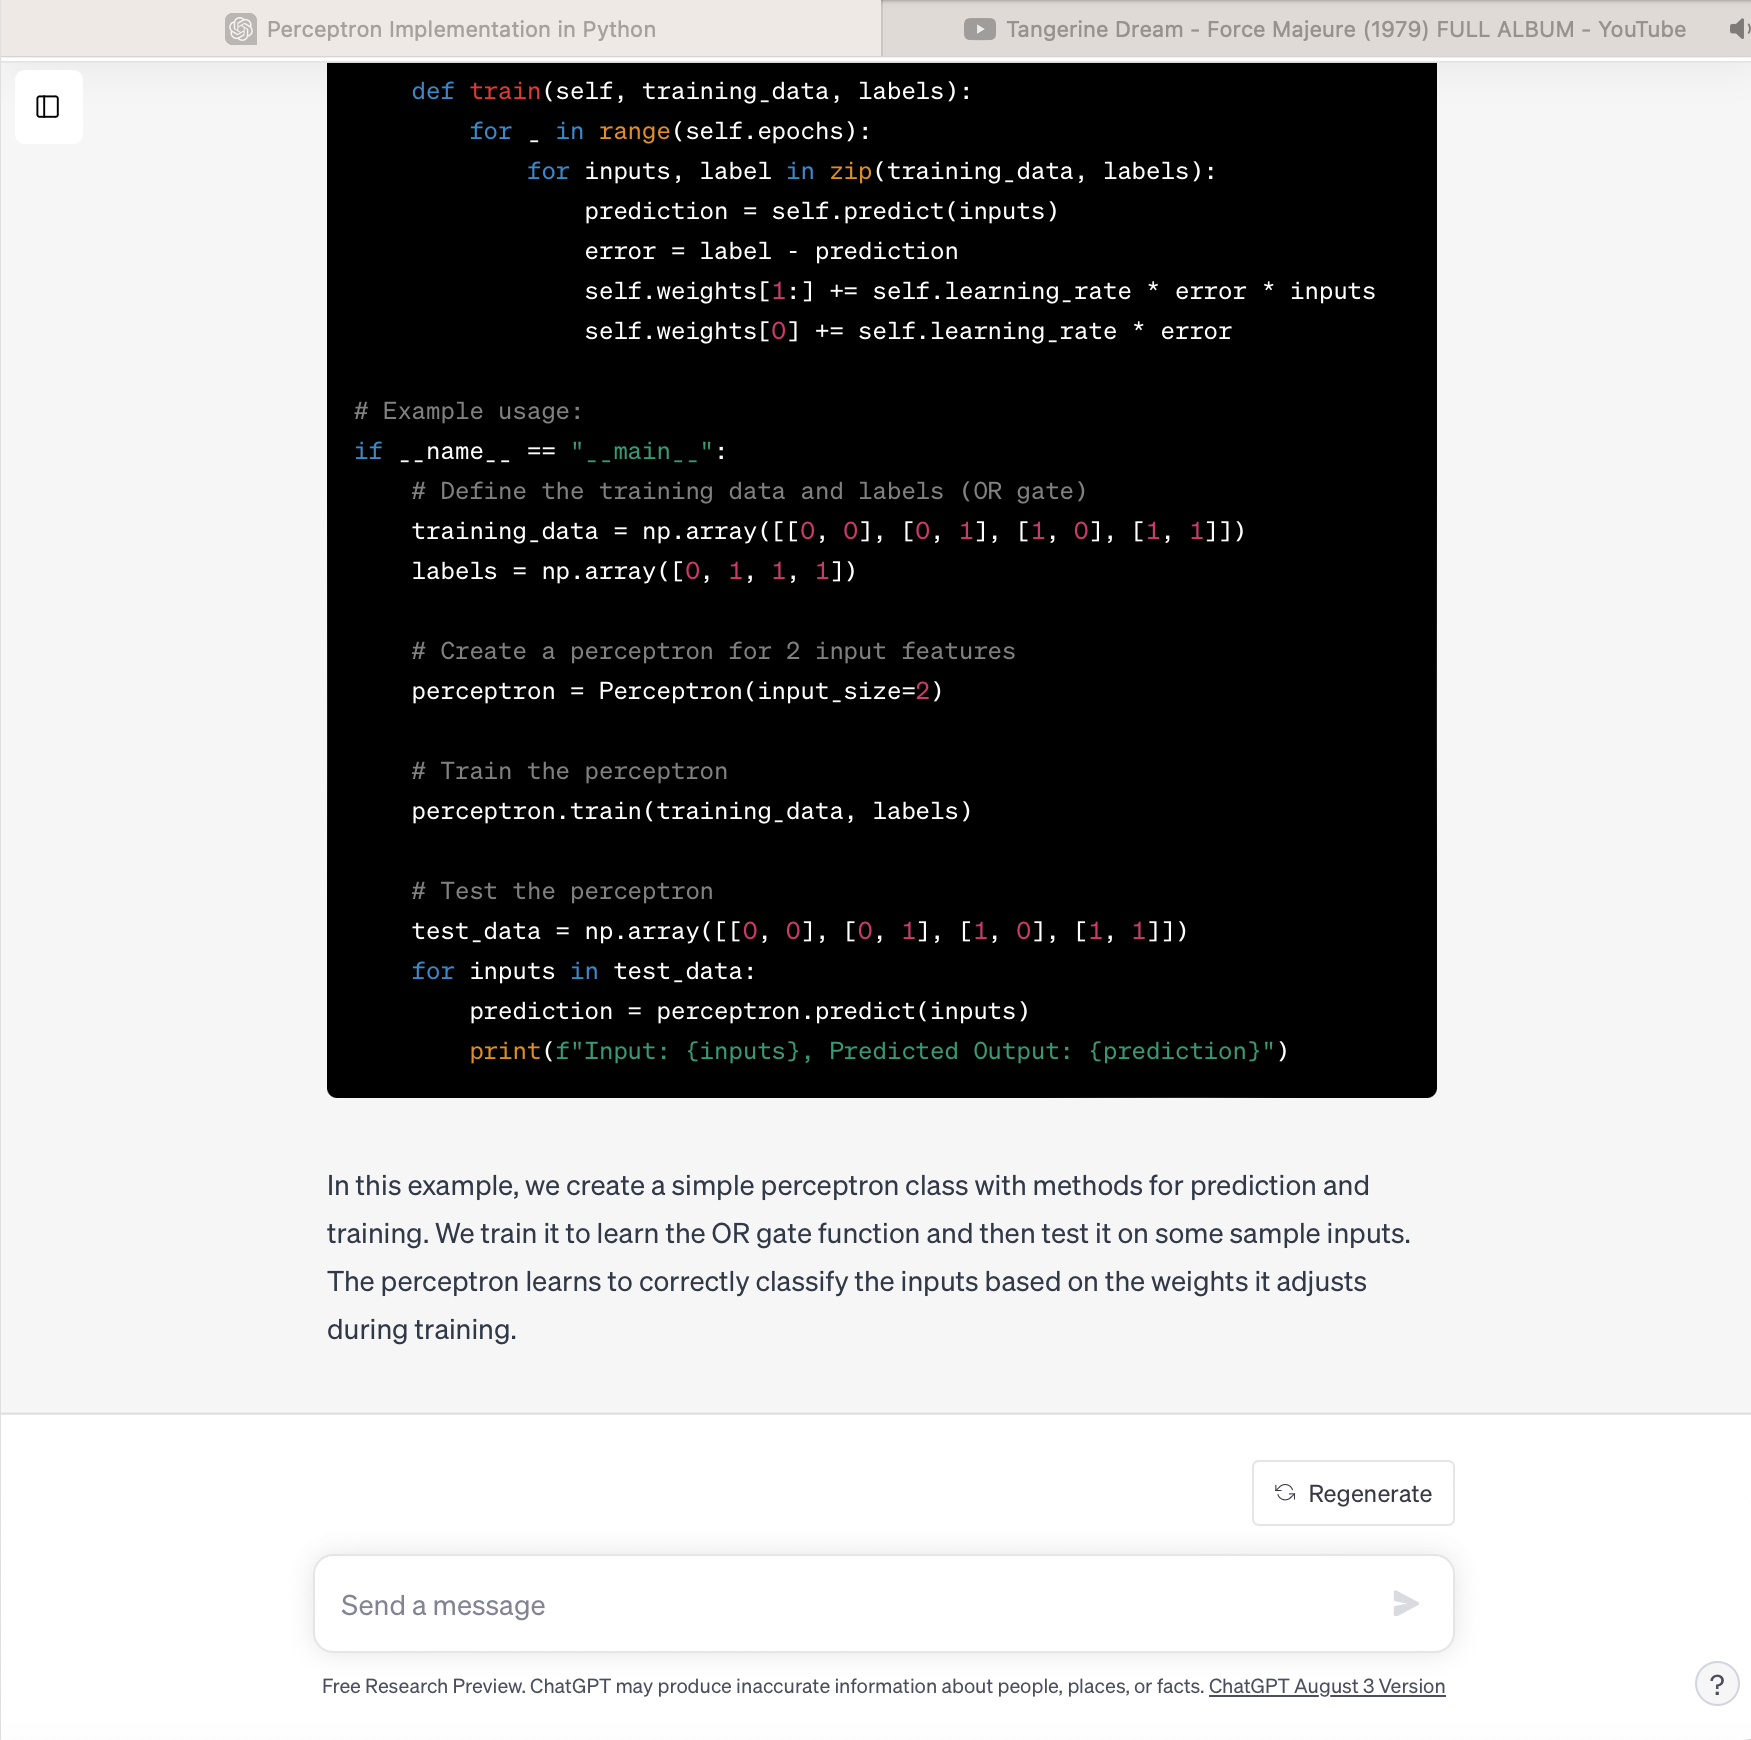

## Preparation Steps

In [ ]:
# Import all necessary python packages
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
# ### Loading the Iris data

s = os.path.join('https://archive.ics.uci.edu', 'ml',
                 'machine-learning-databases', 'iris','iris.data')
s = s.replace("\\","/");
print('URL:', s)
df = pd.read_csv(s,header=None,encoding='utf-8')


URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


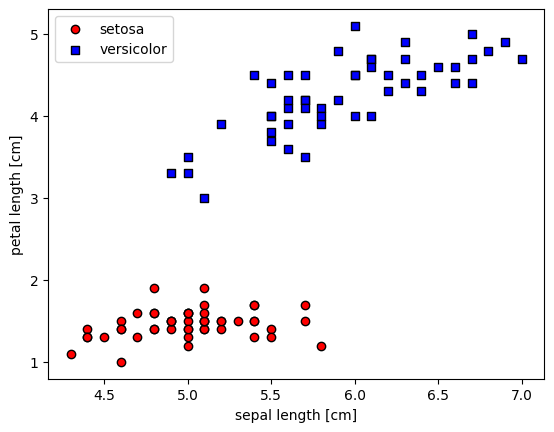

In [ ]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa', edgecolor='black')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='s', label='versicolor', edgecolor='black')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_06.png', dpi=300)
plt.show()

-----------------------
-----------------------
-----------------------



## <font color='#008DFF'> **Question 0: Manual Perceptron Training**

Below you can see 5 points of the data set, all labeled as 'setosa'.

In [ ]:
X[5:10], y[5:10]

(array([[5.4, 1.7],
        [4.6, 1.4],
        [5. , 1.5],
        [4.4, 1.4],
        [4.9, 1.5]]),
 array([-1, -1, -1, -1, -1]))

Suppose the initial weights of the perceptron are $w_0 = 5.0$, $w_1 = -0.1$, $w_2 = 4.5$. Here $w_0$ is the bias.

Write the weights after processing data points 5, 6, 7, and show all your calculations (with $\eta = 0.1$ and noting that $y,\hat{y}\in\{-1,1\}$):

Please give your answers in the cell below.

In [ ]:
import numpy as np

def perceptron_update(w, x, y, eta=0.1):
    """
    Performs one perceptron update step.

    Parameters:
        w (numpy array): Current weight vector [w0, w1, w2]
        x (numpy array): Input vector [x1, x2]
        y (int): True class label (-1 or 1)
        eta (float): Learning rate (default 0.1)

    Returns:
        numpy array: Updated weight vector
    """
    # Compute weighted sum (z)
    z = w[0] + w[1] * x[0] + w[2] * x[1]

    # Compute prediction (sign function)
    y_hat = 1 if z >= 0 else -1

    # Compute error
    error = y - y_hat

    # If error exists, update weights
    if error != 0:
        w[0] += eta * error  # Update bias
        w[1] += eta * error * x[0]  # Update w1 (sepal length)
        w[2] += eta * error * x[1]  # Update w2 (petal length)

    return w

# Initialize weights
weights = np.array([5.0, -0.1, 4.5])

# Data points to process
X_data = np.array([[5.4, 1.7], [4.6, 1.4], [5.0, 1.5]])  # Points 5, 6, 7
y_data = np.array([-1, -1, -1])  # Corresponding labels

# Process each point
for i in range(len(X_data)):
    print(f"Processing Point {i+5} (x1={X_data[i][0]}, x2={X_data[i][1]}, y={y_data[i]})")
    weights = perceptron_update(weights, X_data[i], y_data[i])
    print(f"Updated Weights: w0={weights[0]:.2f}, w1={weights[1]:.2f}, w2={weights[2]:.2f}\n")


Processing Point 5 (x1=5.4, x2=1.7, y=-1)
Updated Weights: w0=4.80, w1=-1.18, w2=4.16

Processing Point 6 (x1=4.6, x2=1.4, y=-1)
Updated Weights: w0=4.60, w1=-2.10, w2=3.88

Processing Point 7 (x1=5.0, x2=1.5, y=-1)
Updated Weights: w0=4.60, w1=-2.10, w2=3.88



(If for this question you have used LLMs such as ChatGPT, replace this text by screenshots of the full transcript of your session. Create extra text cells if needed.)

<br>Processing Point 5 (x1=5.4, x2=1.7, y=-1)
Updated Weights: w0=4.80, w1=-1.18, w2=4.16

<br>Processing Point 6 (x1=4.6, x2=1.4, y=-1)
Updated Weights: w0=4.60, w1=-2.10, w2=3.88


<br>Processing Point 7 (x1=5.0, x2=1.5, y=-1)
Updated Weights: w0=4.60, w1=-2.10, w2=3.88

<br>

In [ ]:
# Grader's area
import numpy as np
M = np.zeros([10,10])
maxScore = 0

maxScore = maxScore +4
# M[0,1] =

-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 1: Perceptron Code Modification**

The following code is a perceptron implementation (with three do-nothing lines 59-61).

In [ ]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier with weight history and early stopping.

    Parameters
    ------------
    n_iter : int
      Maximum passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.
    iter_trained : int
      The number of iterations it took for training.
    weight_history_ : list
      Stores the weight vector after each sample is processed.
    """

    def __init__(self, n_iter=50, random_state=1):
        self.n_iter = n_iter
        self.random_state = random_state
        self.iter_trained = -1  # Stores when training stops
        self.weight_history_ = []  # Stores all weight updates

    def fit(self, X, y):
        """Fit training data with early stopping and weight tracking.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object
        """

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])  # Initialize weights
        self.errors_ = []

        for epoch in range(self.n_iter):
            errors = 0

            for xi, target in zip(X, y):
                # Compute error: Corrected update rule
                update = target - self.predict(xi)  # Corrected from self.predict(xi) - target

                # Only update if prediction was incorrect
                if update != 0:
                    self.w_[1:] += update * xi  # Corrected weight update
                    self.w_[0] += update  # Bias update
                    errors += 1

                # Store weight history after every update
                self.weight_history_.append(self.w_.copy())

            self.errors_.append(errors)

            # ********** EARLY STOPPING CONDITION **********
            if errors == 0:  # Stop if there are no misclassifications
                self.iter_trained = epoch + 1  # Store the number of iterations used
                break  # Exit training loop

        return self

    def net_input(self, X):
        """Calculate net input (weighted sum + bias)"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step function"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)



There are significant errors and omissions in the above perceptron implementation. Work on the above cell and modify the code so that:

(i) The lines containing errors are commented out, and new lines are added with corrected code.<br>
(ii) The omissions are corrected. <br>
(iii) The fit function stops when no more iterations are necessary, and stores the number of iterations required for the training. <br>
(iv) The perceptron maintains a history of its weights, i.e. the set of weights after each point is processed.

At each place where you have modified the code, please add clear comments surrounding it, similarly to the "do-nothing" code. Make sure you evaluate the cell again, so that following cells will be using the modified perceptron.


# Testing (Modified) code below

In [ ]:
# Example Dataset (OR gate)
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([-1, 1, 1, 1])  # Binary class labels

# Initialize and train perceptron
perceptron = Perceptron(n_iter=50, random_state=1)
perceptron.fit(X_train, y_train)

# Print the number of iterations used for training
print("Training stopped after:", perceptron.iter_trained, "iterations")

# Print weight history
print("Weight updates over time:", perceptron.weight_history_)


Training stopped after: 4 iterations
Weight updates over time: [array([-1.98375655, -0.00611756, -0.00528172]), array([ 0.01624345, -0.00611756,  1.99471828]), array([ 0.01624345, -0.00611756,  1.99471828]), array([ 0.01624345, -0.00611756,  1.99471828]), array([-1.98375655, -0.00611756,  1.99471828]), array([-1.98375655, -0.00611756,  1.99471828]), array([0.01624345, 1.99388244, 1.99471828]), array([0.01624345, 1.99388244, 1.99471828]), array([-1.98375655,  1.99388244,  1.99471828]), array([-1.98375655,  1.99388244,  1.99471828]), array([-1.98375655,  1.99388244,  1.99471828]), array([-1.98375655,  1.99388244,  1.99471828]), array([-1.98375655,  1.99388244,  1.99471828]), array([-1.98375655,  1.99388244,  1.99471828]), array([-1.98375655,  1.99388244,  1.99471828]), array([-1.98375655,  1.99388244,  1.99471828])]


(If for this question you have used LLMs such as ChatGPT, replace this text by screenshots of the full transcript of your session. Create extra text cells if needed.)

In [ ]:
# Grader's area

maxScore = maxScore +4
# M[1,1] =
# M[1,2] =
# M[1,3] =
# M[1,4] =

-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 2: Experimenting with hyperparameters**

In [ ]:
import numpy as np

class Perceptron:
    """Perceptron classifier with weight history and early stopping."""

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta  # Learning rate added
        self.n_iter = n_iter
        self.random_state = random_state
        self.iter_trained = -1  # Stores when training stops
        self.weight_history_ = []  # Stores all weight updates

    def fit(self, X, y):
        """Fit training data with early stopping and weight tracking."""
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])  # Initialize weights
        self.errors_ = []

        for epoch in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))  # Apply learning rate
                if update != 0:
                    self.w_[1:] += update * xi
                    self.w_[0] += update
                    errors += 1
                self.weight_history_.append(self.w_.copy())  # Track weight history

            self.errors_.append(errors)

            # Early stopping if no errors
            if errors == 0:
                self.iter_trained = epoch + 1  # Store when training stops
                break

        return self

    def net_input(self, X):
        """Calculate net input (weighted sum + bias)"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step function"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)


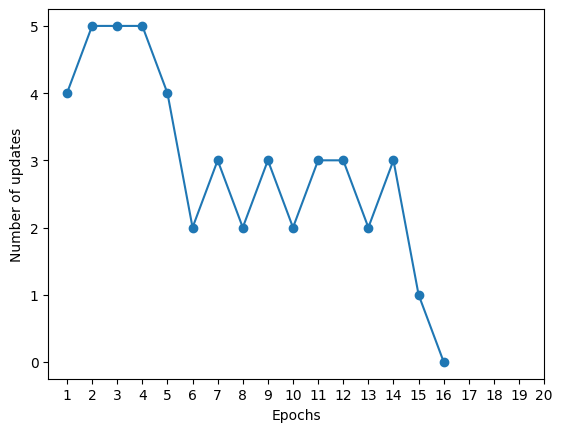

In [ ]:
ppn = Perceptron(eta=0.0001, n_iter=20, random_state=1)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xticks(range(1, 21))  # Set integer x-axis labels
plt.xlabel('Epochs')
plt.ylabel('Number of updates')


plt.show()

### (i) Find values of  𝜂  for which the process requires 10, 20, 30, and 40 iterations to converge

# **Answer is in the output**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a range of eta values to test
eta_values = [0.00001, 0.000049, 0.00002, 0.000205]

# Store results: {eta: iterations to converge}
iterations_needed = {}

# Run perceptron for different eta values
for eta in eta_values:
    ppn = Perceptron(eta=eta, n_iter=50, random_state=1)
    ppn.fit(X, y)

    # Store number of iterations taken to converge
    iterations_needed[eta] = ppn.iter_trained

# Print results for convergence
print("η values that lead to specific iteration counts:")
for eta, iter_count in iterations_needed.items():
    print(f"η = {eta}, Iterations to converge: {iter_count}")

# Identify specific η values that match 10, 20, 30, 40 iterations
target_iterations = [10, 20, 30, 40]
matched_etas = {i: None for i in target_iterations}

for eta, iter_count in iterations_needed.items():
    if iter_count in matched_etas and matched_etas[iter_count] is None:
        matched_etas[iter_count] = eta

# Print matched η values
print("\nSelected η values for required iteration counts:")
for iter_count, eta in matched_etas.items():
    if eta is not None:
        print(f"{iter_count} iterations → η = {eta}")
    else:
        print(f"No exact η found for {iter_count} iterations.")


η values that lead to specific iteration counts:
η = 1e-05, Iterations to converge: 40
η = 4.9e-05, Iterations to converge: 20
η = 2e-05, Iterations to converge: 30
η = 0.000205, Iterations to converge: 10

Selected η values for required iteration counts:
10 iterations → η = 0.000205
20 iterations → η = 4.9e-05
30 iterations → η = 2e-05
40 iterations → η = 1e-05


# (ii) Is it always the case that raising  𝜂  leads to a reduced (or equal) number of iterations? Explain with examples.
Increasing η generally reduces iterations up to a certain point. However, setting η too high can lead to instability, causing oscillations or divergence. Based on the results above we can see raising η initially reduces the number of iterations, but this pattern does not continue indefinitely. Case 1: Moderate
η (Fast Convergence)
For 𝜂 = 0.000205, the perceptron converged in 10 iterations, meaning the learning rate was fast but still stable.

Case 2: Large η (Instability)
If we set 𝜂 = 0.01 or 𝜂 = 0.1, the weight updates become too large, causing the model to overshoot the optimal decision boundary repeatedly. Instead of converging, the perceptron oscillates between incorrect weight values.

### (iii) Find two different settings for the random state, that give different convergence patterns for the same value of  𝜂 .

For random_state=1, the perceptron converged in 10 iterations.
For random_state=42, the perceptron converged in 2 iterations.


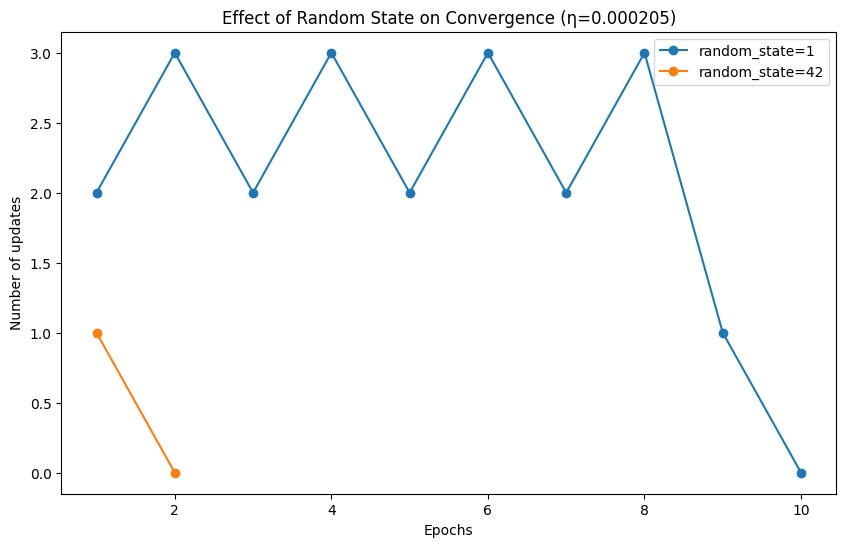

In [ ]:
import matplotlib.pyplot as plt

eta_fixed = 0.000205  # Use a previously found good eta
random_states = [1, 42]  # Two different random states

plt.figure(figsize=(10, 6))

for rand_state in random_states:
    ppn = Perceptron(eta=eta_fixed, n_iter=50, random_state=rand_state)
    ppn.fit(X, y)
    plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o', label=f'random_state={rand_state}')

    # Print the number of iterations required for convergence
    print(f"For random_state={rand_state}, the perceptron converged in {ppn.iter_trained} iterations.")

plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.legend()
plt.title(f'Effect of Random State on Convergence (η={eta_fixed})')
plt.show()


Running the above code, you can verify whether your modification in Question 1 works correctly. The point of this question is to experiment with the hyperparameter $\eta$, the learning rate. Here are some specific questions:
<br>

(i) Find values of $\eta$ for which the process requires 10, 20, 30, and 40 iterations to converge. <br>
(ii) Is it always the case that raising $\eta$ leads to a reduced (or equal) number of iterations? Explain with examples. <br>
(iii) Find two different settings for the random state, that give different convergence patterns for the same value of $\eta$. <br>
(iv) Based on your experiences in parts (i)-(iii), would **binary search** be an appropriate strategy for determining values of $\eta$ for which the perceptron converges within a desired number of iterations?

Please give your answers in the cell below.

According to the plot different random_state values affect the perceptron's convergence, even with the same learning rate (η = 0.000205). The blue line which represents randome state 1 converges after 10 epochs, whereas random state 42 represented by the orange line converges after just 2 epochs. Another observation I made was that random state 42 had fewer misclassifications from the start, meaning the initial weight values were closer to a good decision boundary.

<br>(i)Selected η values for required iteration counts:
10 iterations → η = 0.000205
20 iterations → η = 4.9e-05
30 iterations → η = 2e-05
40 iterations → η = 1e-05

<br>(ii)Increasing η generally reduces iterations up to a certain point. However, setting η too high can lead to instability, causing oscillations or divergence. Based on the results above we can see raising η initially reduces the number of iterations, but this pattern does not continue indefinitely.

Case 1: Moderate η (Fast Convergence) For η=0.000205, the perceptron converged in 10 iterations, meaning the learning rate was fast but still stable.

Case 2: Large η (Instability) If we set η=0.01 or η = 0.1, the weight updates become too large, causing the model to overshoot the optimal decision boundary repeatedly. Instead of converging, the perceptron oscillates between incorrect weight values.


<br>(iii)According to the plot different random_state values affect the perceptron's convergence, even with the same learning rate (η = 0.000205). The blue line which represents randome state 1 converges after 10 epochs, whereas random state 42 represented by the orange line converges after just 2 epochs. Another observation I made was that random state 42 had fewer misclassifications from the start, meaning the initial weight values were closer to a good decision boundary.


<br>(iv)Binary search is not a suitable strategy for finding the optimal
η because the relationship between η and convergence is not monotonic. In part (i), I observed that increasing η initially reduced iterations (e.g., 𝜂 = 0.000205 converged in 10 epochs), but at higher values, the perceptron became unstable and oscillated instead of converging. In part (iii), different random_state values led to varying convergence patterns even with the same
η, proving that weight initialization significantly impacts training. Since binary search relies on predictable trends, these inconsistencies make it unreliable

<br>

(If for this question you have used LLMs such as ChatGPT, replace this text by screenshots of the full transcript of your session. Create extra text cells if needed.)

In [ ]:
# Grader's area

maxScore = maxScore +4
# M[2,1] =
# M[2,2] =
# M[2,3] =
# M[2,4] =

-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 3: Visualizing multiple decision regions over time**

Here is the function for visualizing decision regions.

In [ ]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'o', 'P', '^', 'v')
    # colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    colors = ['#FF0000', '#0000FF', '#90EE90', '#808080', '#00FFFF']
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 5, X[:, 0].max() + 5
    x2_min, x2_max = X[:, 1].min() - 5, X[:, 1].max() + 5
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

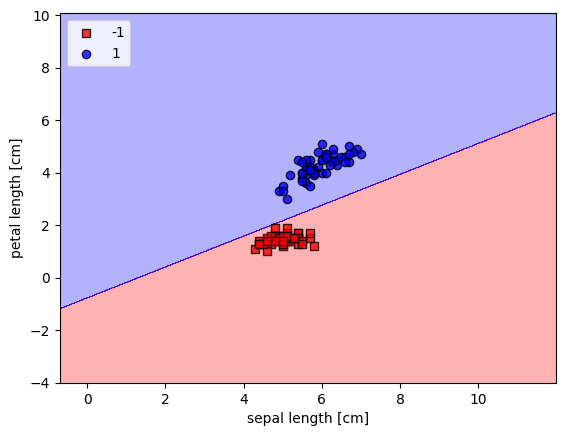

In [ ]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

Using the above, give code that plots the decision regions for the first 10 epochs. Use learning rate = 0.005 and random seed = 3 when applicable.

In [ ]:
class Perceptron:
    """Perceptron classifier with weight history and early stopping."""

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta  # Learning rate added
        self.n_iter = n_iter
        self.random_state = random_state
        self.iter_trained = -1  # Stores when training stops
        self.weight_history_ = []  # Stores all weight updates per epoch

    def fit(self, X, y):
        """Fit training data with early stopping and weight tracking."""
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])  # Initialize weights
        self.errors_ = []

        for epoch in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))  # Apply learning rate
                if update != 0:
                    self.w_[1:] += update * xi
                    self.w_[0] += update
                    errors += 1

            # Store the weights *after* each epoch instead of after each sample
            self.weight_history_.append(self.w_.copy())

            self.errors_.append(errors)

            # Early stopping if no errors
            if errors == 0:
                self.iter_trained = epoch + 1  # Store when training stops
                break

        return self

    def net_input(self, X):
        """Calculate net input (weighted sum + bias)"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step function"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)


In [ ]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'o', 'P', '^', 'v')
    colors = ['#FF0000', '#0000FF', '#90EE90', '#808080', '#00FFFF']
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 5, X[:, 0].max() + 5
    x2_min, x2_max = X[:, 1].min() - 5, X[:, 1].max() + 5
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')


In [ ]:
# Train perceptron with the required settings
ppn = Perceptron(eta=0.005, n_iter=10, random_state=3)
ppn.fit(X, y)  # Train on dataset

# Print misclassification history
print("Misclassifications per epoch:", ppn.errors_)

# Print weights per epoch
for epoch in range(len(ppn.weight_history_)):
    w0, w1, w2 = ppn.weight_history_[epoch]
    print(f"Epoch {epoch + 1}: Weights -> w0: {w0:.4f}, w1: {w1:.4f}, w2: {w2:.4f}")


Misclassifications per epoch: [2, 2, 3, 1, 0]
Epoch 1: Weights -> w0: 0.0179, w1: 0.0234, w2: 0.0340
Epoch 2: Weights -> w0: 0.0179, w1: 0.0424, w2: 0.0670
Epoch 3: Weights -> w0: 0.0079, w1: 0.0124, w2: 0.0860
Epoch 4: Weights -> w0: -0.0021, w1: -0.0386, w2: 0.0720
Epoch 5: Weights -> w0: -0.0021, w1: -0.0386, w2: 0.0720


Epoch 1: Weights -> w0: 0.0179, w1: 0.0234, w2: 0.0340


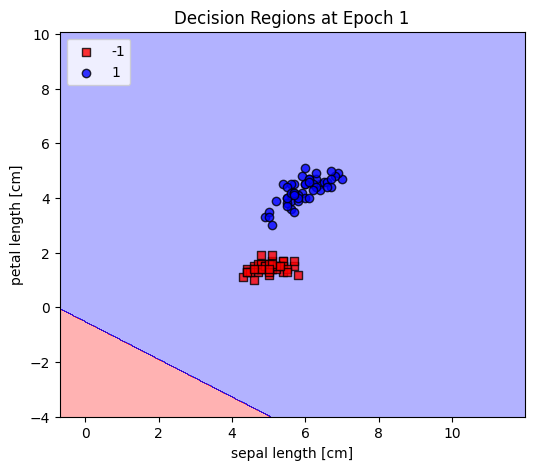

Epoch 2: Weights -> w0: 0.0179, w1: 0.0424, w2: 0.0670


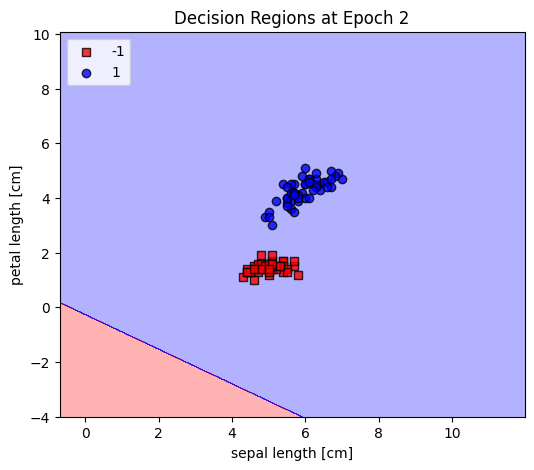

Epoch 3: Weights -> w0: 0.0079, w1: 0.0124, w2: 0.0860


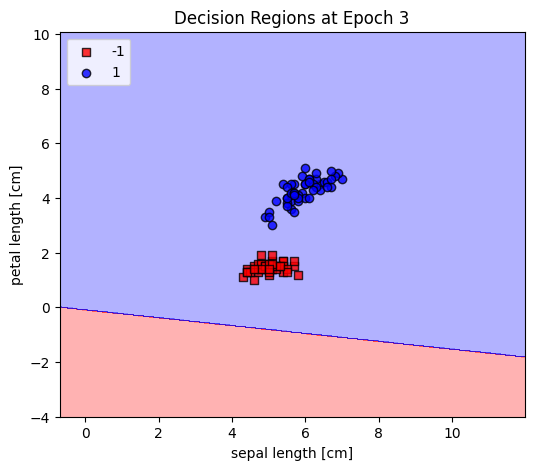

Epoch 4: Weights -> w0: -0.0021, w1: -0.0386, w2: 0.0720


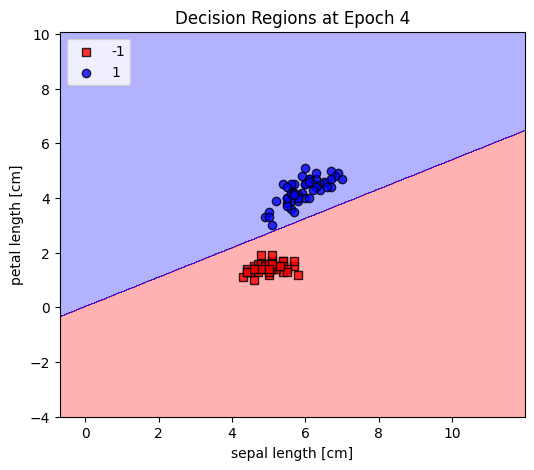

Epoch 5: Weights -> w0: -0.0021, w1: -0.0386, w2: 0.0720


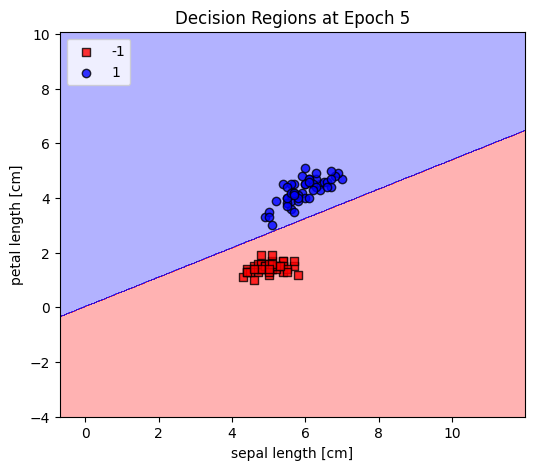

In [ ]:
# Plot decision regions only for the trained epochs (stops early if converged)
for epoch in range(min(ppn.iter_trained, len(ppn.weight_history_))):
    plt.figure(figsize=(6, 5))

    # Retrieve weights for the given epoch
    ppn.w_ = ppn.weight_history_[epoch]

    # Plot decision boundary using the professor's function
    plot_decision_regions(X, y, classifier=ppn)

    # Print weight values
    print(f"Epoch {epoch + 1}: Weights -> w0: {ppn.w_[0]:.4f}, w1: {ppn.w_[1]:.4f}, w2: {ppn.w_[2]:.4f}")

    # Labels and title
    plt.xlabel('sepal length [cm]')
    plt.ylabel('petal length [cm]')
    plt.title(f'Decision Regions at Epoch {epoch + 1}')
    plt.legend(loc='upper left')

    plt.show()


(If for this question you have used LLMs such as ChatGPT, replace this text by screenshots of the full transcript of your session. Create extra text cells if needed.)

In [ ]:
#
#
#

In [ ]:
# Grader's area

maxScore = maxScore +4
# M[3,1] =


-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 4: Changing the data order in training**



In [ ]:
# establish a random shuffle
# s = np.arange(10)
# np.random.shuffle(s)
# shuffle sample
# X_shuffle = X[s];
# y_shuffle = y[s];


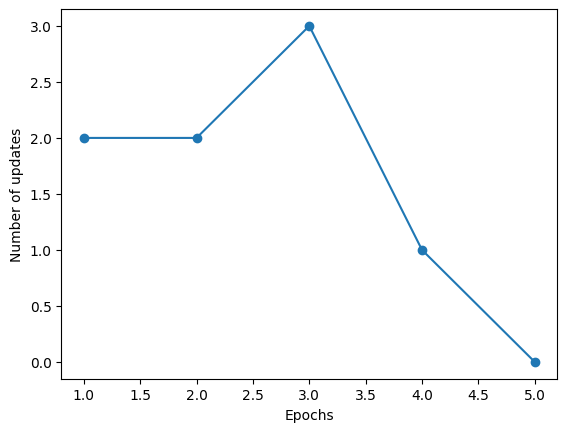

In [ ]:

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

The data arrays (X, y) currently in the memory are organized so that all data points with a given label (e.g. 'Setosa') lie in a contiguous part of the arrays (X, y). In this question we will check the impact of changing the order of the data on the number of iterations required to learn a correct perceptron.


The commented code below needs a small change in order to generate a random shuffle (permutation) of the data. Please look up the particular functions of the code, see how they work, and then do the required modification and uncomment / evaluate the code.

Modify the code below as follows: <br>
(i) Pick a sufficiently small value of $\eta$, so that convergence takes 20 iterations or more. <br>
(ii) Add an extra line that fits the perceptron on the shuffled data. <br>
(iii) Plot the error for both training processes (the original data and the shuffled data). <br>
(iv) What do you observe?

In [ ]:
# Establish a random shuffle
s = np.arange(y.shape[0])  # Create an array of indices
np.random.shuffle(s)  # Randomly shuffle the indices

# Apply the shuffle to the dataset
X_shuffle = X[s]
y_shuffle = y[s]

# Train perceptron on original data
ppn_original = Perceptron(eta=4.9e-05, n_iter=50, random_state=3)
ppn_original.fit(X, y)

# Train perceptron on shuffled data
ppn_shuffled = Perceptron(eta=4.9e-05, n_iter=50, random_state=3)
ppn_shuffled.fit(X_shuffle, y_shuffle)

# Print misclassification history
print("Misclassifications per epoch (Original Order):", ppn_original.errors_)
print("Misclassifications per epoch (Shuffled Order):", ppn_shuffled.errors_)


Misclassifications per epoch (Original Order): [18, 7, 6, 5, 5, 4, 3, 2, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 1, 0]
Misclassifications per epoch (Shuffled Order): [52, 17, 5, 2, 0]


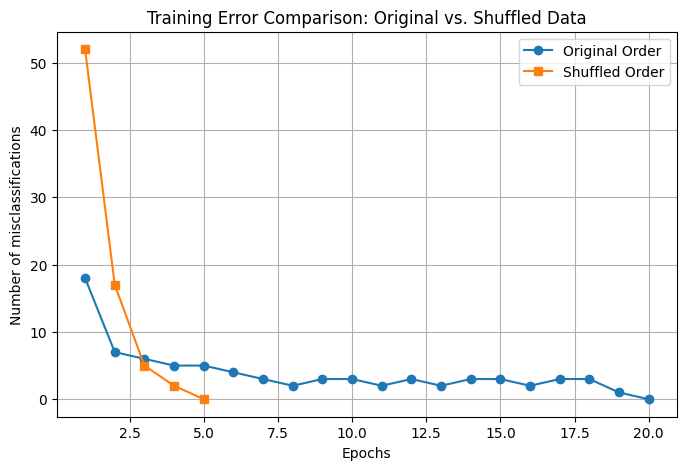

In [ ]:
# Plot error comparison
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(ppn_original.errors_) + 1), ppn_original.errors_, marker='o', label="Original Order")
plt.plot(range(1, len(ppn_shuffled.errors_) + 1), ppn_shuffled.errors_, marker='s', label="Shuffled Order")

# Labels and legend
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.title('Training Error Comparison: Original vs. Shuffled Data')
plt.legend()
plt.grid()

plt.show()


# Run the random shuffle code a second time to confirm findings

Misclassifications per epoch (Original Order): [18, 7, 6, 5, 5, 4, 3, 2, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 1, 0]
Misclassifications per epoch (Shuffled Order): [52, 16, 3, 8, 2, 0]


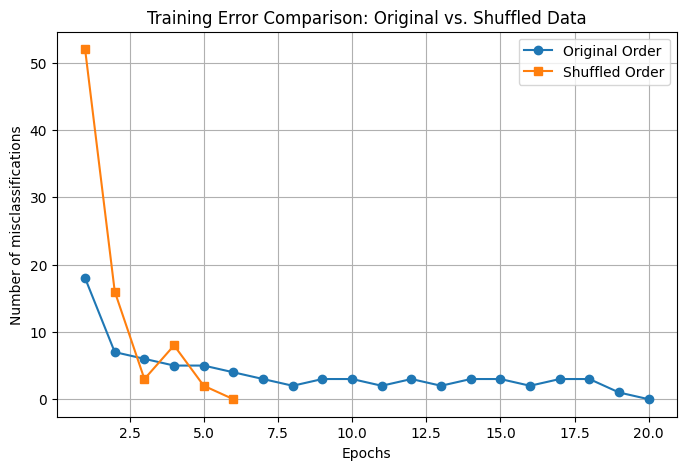

In [ ]:
# Establish a random shuffle
s = np.arange(y.shape[0])  # Create an array of indices
np.random.shuffle(s)  # Randomly shuffle the indices

# Apply the shuffle to the dataset
X_shuffle = X[s]
y_shuffle = y[s]

# Train perceptron on original data
ppn_original = Perceptron(eta=4.9e-05, n_iter=50, random_state=3)
ppn_original.fit(X, y)

# Train perceptron on shuffled data
ppn_shuffled = Perceptron(eta=4.9e-05, n_iter=50, random_state=3)
ppn_shuffled.fit(X_shuffle, y_shuffle)

# Print misclassification history
print("Misclassifications per epoch (Original Order):", ppn_original.errors_)
print("Misclassifications per epoch (Shuffled Order):", ppn_shuffled.errors_)

# Plot error comparison
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(ppn_original.errors_) + 1), ppn_original.errors_, marker='o', label="Original Order")
plt.plot(range(1, len(ppn_shuffled.errors_) + 1), ppn_shuffled.errors_, marker='s', label="Shuffled Order")

# Labels and legend
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.title('Training Error Comparison: Original vs. Shuffled Data')
plt.legend()
plt.grid()

plt.show()


(If for this question you have used LLMs such as ChatGPT, replace this text by screenshots of the full transcript of your session. Create extra text cells if needed.)

Give your answers here.

# Observation:

Shuffling the training data significantly improves the perceptron’s learning efficiency. The shuffled data converges much faster, around epoch 5-6, while the original order takes longer and fluctuates before stabilizing at epoch 20. This could be because the original order presents one class at a time, causing the perceptron to initially learn a biased decision boundary that requires more corrections. Shuffling on the otherhand ensures the model sees mixed labels early, leading to better adjustments and faster convergence.
<br>
<br>
<br>

In [ ]:
# Grader's area

maxScore = maxScore +4
# M[4,1] =
# M[4,2] =
# M[4,3] =
# M[4,4] =

-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 5: Understanding linear transformations**

Suppose that we have a 2-dimensional data set $X$. We transform each data point $X_j = (X_{j,1}, X_{j,2})$ as follows: $\tilde{X_j} = ( a X_{j,1} - c, b X_{j,2}-c)$, where $a$, $b$, $c$ are constant values. This is a linear transformation, because our transformed data comes from simple operations that use 'first powers' of the original data.

If our given data set is linearly separable, does the same hold true for the transformed set? In the following cells you can plot a transformed version of the Iris dataset, so that you see how it behaves (for your choice of $a$, $b$, $c$.) But you should also try and justify your answer in a theoretical way: if there exists a  'good' perceptron for the original data set, what would be the weights for the perceptron that works on the transformed set? Are there any issues that might arise?

(1) Give your own answer to the above question.

(2) What happens when you use an LLM such as ChatGPT to answer the question? Is the LLM's answer fully correct? If not, what mistake(s) did it make?

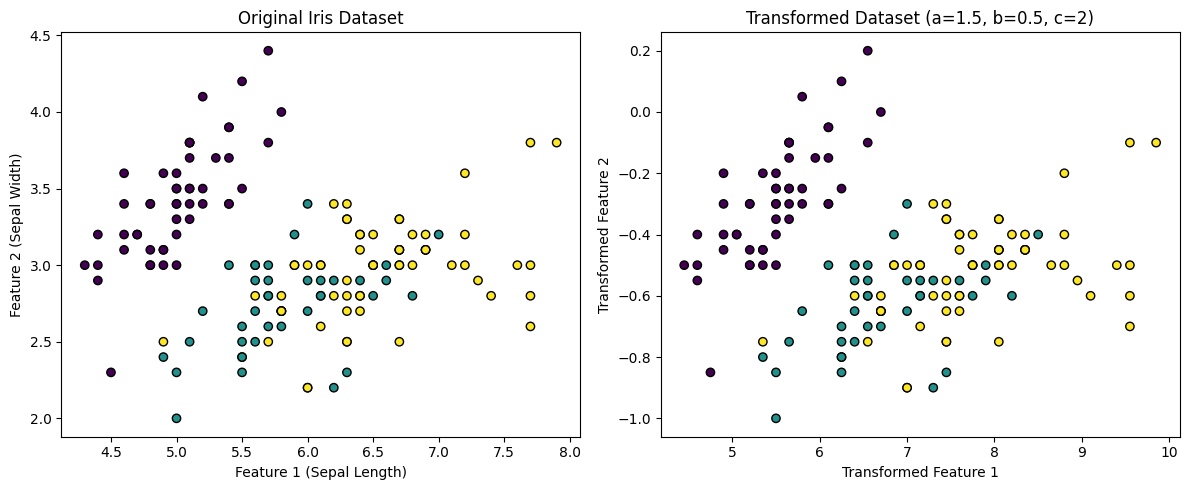

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Taking only the first two features for 2D visualization
y = iris.target  # Class labels

# Define transformation parameters
a, b, c = 1.5, 0.5, 2  # Adjust these values to see different transformations

# Apply linear transformation
X_transformed = np.zeros_like(X)
X_transformed[:, 0] = a * X[:, 0] - c
X_transformed[:, 1] = b * X[:, 1] - c

# Plot the original and transformed datasets
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Original Dataset
ax[0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
ax[0].set_title("Original Iris Dataset")
ax[0].set_xlabel("Feature 1 (Sepal Length)")
ax[0].set_ylabel("Feature 2 (Sepal Width)")

# Transformed Dataset
ax[1].scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis', edgecolors='k')
ax[1].set_title(f"Transformed Dataset (a={a}, b={b}, c={c})")
ax[1].set_xlabel("Transformed Feature 1")
ax[1].set_ylabel("Transformed Feature 2")

plt.tight_layout()
plt.show()


# Linear Separability?
The transformed dataset still appears to maintain its structure, meaning that the relative distances between clusters remain the same. Since the transformation only scales and shifts the data (multiplying by a,b and subtracting c), it does not introduce non-linearity.

# Analysis of the Transformed Iris Dataset

Looking at the plot, I can see that the **original dataset** (left) and the **transformed dataset** (right) maintain the same general structure. The clusters in the original dataset remain **visibly distinct** even after applying the transformation. This suggests that **linear separability is preserved**, meaning if a perceptron could classify the original dataset, it should still work on the transformed version with adjusted weights.

### **What the Plot Shows About the Transformation**  
- **Scaling & Shifting Effects:** The transformation applied (\( a = 1.5, b = 0.5, c = 2 \)) stretched the x-axis and compressed the y-axis while shifting all points downward. Despite these changes, the relative positioning of clusters remains unchanged.  
- **Cluster Distinctions Are Maintained:** The three classes are still **visibly separate**, meaning the decision boundaries that worked for the original dataset can be adjusted to fit the transformed data.  
- **No Overlapping or Merging:** If the transformation had caused clusters to **overlap or merge**, that would indicate separability was lost. However, that’s not happening here—the structure of the dataset is still intact.

Since the transformation only **scales and shifts** the data but does not distort it non-linearly, we can conclude that the transformed dataset remains **linearly separable**. Mathematically, the perceptron decision boundary in the original dataset.

The perceptron weights transform as:

$$
w'_1 = \frac{w_1}{a}, \quad w'_2 = \frac{w_2}{b}, \quad b' = b + w_1 \frac{c}{a} + w_2 \frac{c}{b}
$$



### **Comparison of My Answer and the AI Chat Response**
Both answers correctly conclude that **linear separability is preserved** under the given transformation, and both derive how the perceptron’s weights adjust. However, there are **differences in structure, explanation style, and potential issues addressed**.

The chatbot unnecessarily complicates the explanation by using inverse transformations instead of directly applying the perceptron equation. It also fails to provide an intuitive or visual confirmation of separability. While correct in theory, the response lacks clarity, notation consistency, and practical considerations like numerical stability

(Replace this text by screenshots of the full transcript of your LLM session. Create extra text cells if needed.)

In [ ]:
# Grader's area

maxScore = maxScore + 4
# M[5,1] =

maxScore = maxScore + 4
# M[5,2] =



-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 6: Linear regression with numpy 1-liners**

(If for this question you have used LLMs such as ChatGPT, replace this text by screenshots of the full transcript of your session. Create extra text cells if needed.)

In [ ]:
# here we initialize a random data matrix X and random numerical labels y
import numpy as np

X = np.random.randn(10,3)
y = np.random.randn(10,1)

# we also initialize a hypothetical hyperplane defined by w and b
w = np.random.randn(1,3)
b = -1


In [ ]:
# (i) find the numerical labels predicted by the model (w,b) for the points in X
#     your code should be a single numpy line
#     hint: we wrote this equation for a single point x in class
#           try to generalize it by expressing everying in terms of matrices

# your code goes here

y_predicted = X @ w.T + b

# y_predicted =


In [ ]:
# (ii) find the updated weights after one application of gradient descent with lr = 0.1
#      your code should be a single numpy line

y_ = np.random.randn(10,1)

w = w - 0.1 * (X.T @ (y_predicted - y_)) / X.shape[0]  # Gradient descent update


In [ ]:
# Print predictions
print("Predicted y values (y_predicted):\n", y_predicted)

# Print updated weights after one gradient descent step
print("\nUpdated weights (w) after gradient descent:\n", w)


Predicted y values (y_predicted):
 [[ 2.20655847]
 [ 0.35313756]
 [-1.62223216]
 [ 1.84268575]
 [-4.99082438]
 [-0.76955405]
 [-1.06214417]
 [-0.87601841]
 [-2.47555735]
 [-0.59537298]]

Updated weights (w) after gradient descent:
 [[ 0.3701271   1.02602543 -1.39810702]
 [ 0.32524441  0.98114274 -1.44298971]
 [ 0.6328235   1.28872183 -1.13541062]]


In [ ]:
# Grader's area

maxScore = maxScore +4
# M[6,1] =

maxScore = maxScore +4
# M[6,2] =


-----------------------
-----------------------
-----------------------


In [ ]:
#Grader's area

rawScore = np.sum(M)
score = rawScore*100/maxScore